In [1]:
from pathlib import Path

import networkx as nx
import pandas as pd
from sklearn.metrics.pairwise import distance_metrics

from src.num_clusters.elbow_rule import elbow_rule
from src.num_clusters.silhouette_method import silhouette_method
from src.utils import convert_distance_to_similarity
from src.experiment import experiment

In [2]:
x_path = Path('data/X_4_1.xlsx')
y_path = Path('data/Y_4_1.xlsx')

x_data = pd.read_excel(x_path, header=None)
y_data = pd.read_excel(y_path, header=None)

### About distance functions
We decided to choose cosine and euclidean distance functions because of they are most popular and common way to compute distance beetween vectors. Moreover, they are used in different Machine Learning algorithms such as Intellectual Data Selection (euclidean is used for vector similarity measurement), Self Supervised Prototype (cosine similarity is used) and others that make them more interesting to investigation.

In [3]:
distance_metrics_dict = distance_metrics()

euclidean_distance_func = distance_metrics_dict['euclidean']
cosine_distance_func = distance_metrics_dict['cosine']

In [4]:
euclidean_distance_x = euclidean_distance_func(x_data)
cosine_distance_y = cosine_distance_func(y_data)

euclidean_similarity_x = convert_distance_to_similarity(euclidean_distance_x)
cosine_similarity_y = convert_distance_to_similarity(cosine_distance_y)

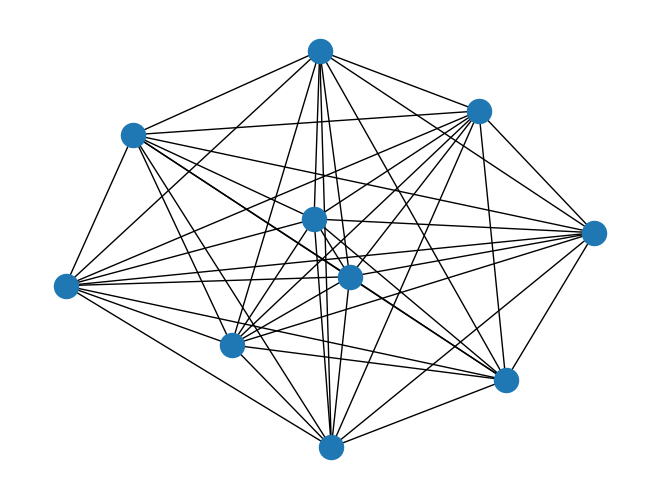

In [5]:
nx.draw(nx.from_numpy_array(cosine_distance_y[:10, :10]))

## Clustering algorithms

- AgglomerativeClustering
- K-Means
- Spectral Clustering
- Gaussian Mixture (EM)

## Experiments with data X

Experiments with Data X

Num Clusters 2
Pairwise RI Score
+--------------------------------+----------------------------------+----------+------------+-----------------------+
|                                |   Agglomerative (single linkage) |   KMeans |   Spectral |   EM Gaussian Mixture |
|--------------------------------+----------------------------------+----------+------------+-----------------------|
| Agglomerative (single linkage) |                         1        | 0.515628 |   0.515628 |              0.519648 |
| KMeans                         |                         0.515628 | 1        |   1        |              0.980101 |
| Spectral                       |                         0.515628 | 1        |   1        |              0.980101 |
| EM Gaussian Mixture            |                         0.519648 | 0.980101 |   0.980101 |              1        |
+--------------------------------+----------------------------------+----------+------------+-----------------------

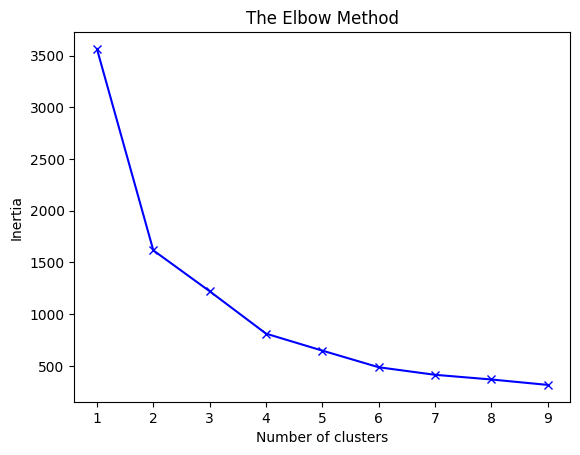

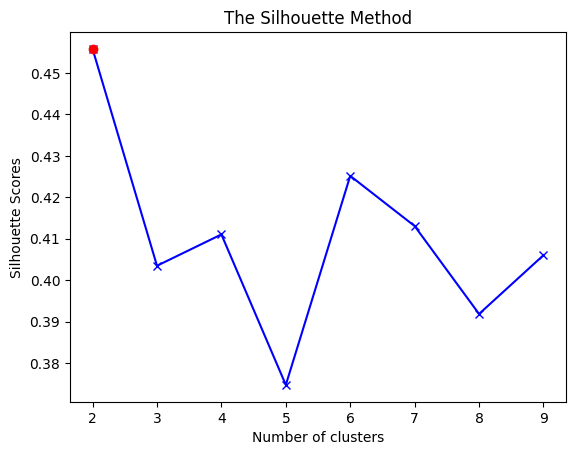

In [6]:
experiment(data=x_data,
           clusters_list=[2,3],
           data_name='Data X',
           linkage='single',
           agglomerative_matrix=euclidean_distance_x,
           similarity_matrix=euclidean_similarity_x)

fig = elbow_rule(x_data, 10)
silhouette_method(x_data, 10)
pass

### Overview of experiments with Data X
**Num Clusters 2**

According to **Pairwise RI Score**: partition of *Agglomerative (single linkage)* algorithm similar to that of *EM Gaussian Mixture* algorithm with **0.519648** accuracy; partiton of *KMeans* algorithm similar to that of *Spectral* algorithm with **1** accuracy; partiton of *Spectral* algorithm similar to that of *KMeans* algorithm with **1** accuracy; partiton of *EM Gaussian Mixture* algorithm similar to that of *KMeans* and *Spectral* algorithms with **0.980101** accuracy.
```
So the most matching clustering algorithms are KMeans and Spectral. Note that Pairwise RI Score does not reflect the quality of clusters recived by the algorithms. Therefore it is possible to judge how similar clusters are only.
```

Turning to **Pairwise AMI Score** it is needed to say that the essence of this score matches with that of **Pairwise RI Score**. So in this case we can only judge how similar clusters received of the algorithms are only. The tendency of similarity is similar to the previous case.
```
The most matching clustering algorithms are KMeans and Spectral with 1 accuracy.
```

Lets say about quality of clustering. For this look for **Modularity** score of partitions recived by the algorithms. Single value of the modularity score not have important sence. The power of modularity manifests in comparison. Than large value of modularity of the partition that the best partition is.
```
The clusters recived by KMeans and Spectral algorithms are best with 0.166834 modularity score.
```

**Num Clusters 3**

According to **Pairwise RI Score**: partition of *Agglomerative (single linkage)* algorithm similar to that of *KMeans* algorithm with **0.572663** accuracy; partiton of *KMeans* algorithm similar to that of *EM Gaussian Mixture* algorithm with **0.728643** accuracy; partiton of *Spectral* algorithm similar to that of *KMeans* algorithm with **0.71201** accuracy; partiton of *EM Gaussian Mixture* algorithm similar to that of *KMeans* algorithm with **0.728643** accuracy.
```
So the most matching clustering algorithms are KMeans and EM Gaussian Mixture. Note that Pairwise RI Score does not reflect the quality of clusters recived by the algorithms. Therefore it is possible to judge how similar clusters are only.
```

Turning to **Pairwise AMI Score** it is needed to say that the essence of this score matches with that of **Pairwise RI Score**. So in this case we can only judge how similar clusters received of the algorithms are only. The tendency of similarity is similar to the previous case.
```
The most matching clustering algorithms are KMeans and EM Gaussian Mixture with 0.476565 accuracy.
```

Lets say about quality of clustering. For this look for **Modularity** score of partitions recived by the algorithms. Single value of the modularity score not have important sence. The power of modularity manifests in comparison. Than large value of modularity of the partition that the best partition is.
```
The clusters recived by KMeans algorithm is best with 0.183458 modularity score.
```

The Elbow and Silhouette methods able to find optimal number of clusters for the task. In the both method the optimal number is two.

## Experiments with data Y

Experiments with Data Y

Num Clusters 2
Pairwise RI Score
+----------------------------------+------------------------------------+----------+------------+-----------------------+
|                                  |   Agglomerative (complete linkage) |   KMeans |   Spectral |   EM Gaussian Mixture |
|----------------------------------+------------------------------------+----------+------------+-----------------------|
| Agglomerative (complete linkage) |                           1        | 0.608492 |   1        |              1        |
| KMeans                           |                           0.608492 | 1        |   0.608492 |              0.608492 |
| Spectral                         |                           1        | 0.608492 |   1        |              1        |
| EM Gaussian Mixture              |                           1        | 0.608492 |   1        |              1        |
+----------------------------------+------------------------------------+----------+----

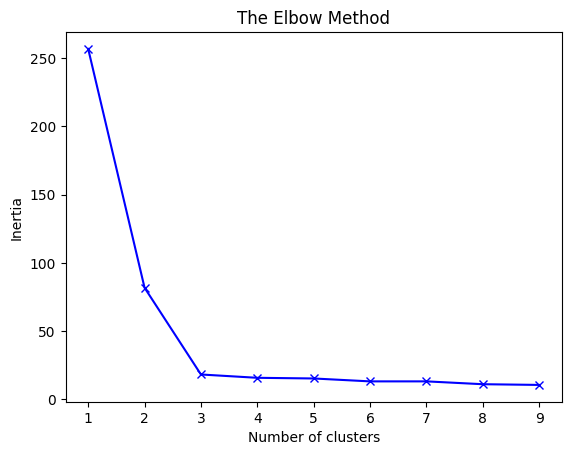

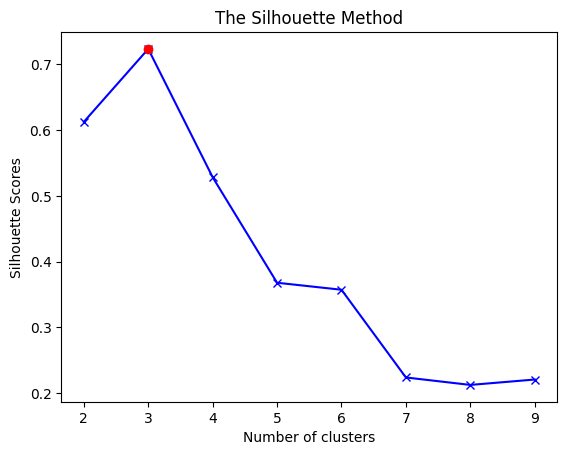

In [7]:
experiment(data=y_data,
           clusters_list=[2,3],
           data_name='Data Y',
           linkage='complete',
           agglomerative_matrix=cosine_distance_y,
           similarity_matrix=cosine_similarity_y)

fig = elbow_rule(y_data, 10)
silhouette_method(y_data, 10)
pass

### Overview of experiments with Data Y
**Num Clusters 2**

According to **Pairwise RI Score**: partition of *Agglomerative (complete linkage)* algorithm similar to that of * KMeans* and *Spectral* algorithms with **1** accuracy; partiton of *KMeans* algorithm similar to that of *Spectral* and *Agglomerative (complete linkage)* algorithms with **1** accuracy; partiton of *Spectral* algorithm similar to that of *KMeans* and *Agglomerative (complete linkage)* algorithms with **1** accuracy; partiton of *EM Gaussian Mixture* algorithm similar to that of *KMeans*, *Spectral* and *Agglomerative (complete linkage)* algorithms with **0.608492** accuracy.
```
So the most matching clustering algorithms are KMeans, Spectral and Agglomerative (complete linkage). Note that Pairwise RI Score does not reflect the quality of clusters recived by the algorithms. Therefore it is possible to judge how similar clusters are only.
```

Turning to **Pairwise AMI Score** it is needed to say that the essence of this score matches with that of **Pairwise RI Score**. So in this case we can only judge how similar clusters received of the algorithms are only. The tendency of similarity is similar to the previous case.
```
The most matching clustering algorithms are KMeans, Spectral and Agglomerative (complete linkage) with 1 accuracy.
```

Lets say about quality of clustering. For this look for **Modularity** score of partitions recived by the algorithms. Single value of the modularity score not have important sence. The power of modularity manifests in comparison. Than large value of modularity of the partition that the best partition is.
```
The clusters recived by KMeans, Spectral and Agglomerative (complete linkage) algorithms are best with 0.048674 modularity score.
```

**Num Clusters 3**

According to **Pairwise RI Score**: partition of *Agglomerative (complete linkage)* algorithm similar to that of *KMeans* and *EM Gaussian Mixture* algorithms with **1** accuracy; partiton of *KMeans* algorithm similar to that of *EM Gaussian Mixture* and *Agglomerative (complete linkage)* algorithms with **1** accuracy; partiton of *Spectral* algorithm similar to that of *KMeans*, *EM Gaussian Mixture* and *Agglomerative (complete linkage)* algorithms with **0.993266** accuracy; partiton of *EM Gaussian Mixture* algorithm similar to that of *KMeans* and *Agglomerative (complete linkage)* algorithms with **1** accuracy.
```
So the most matching clustering algorithms are KMeans, EM Gaussian Mixture qnd Agglomerative (complete linkage). Note that Pairwise RI Score does not reflect the quality of clusters recived by the algorithms. Therefore it is possible to judge how similar clusters are only.
```

Turning to **Pairwise AMI Score** it is needed to say that the essence of this score matches with that of **Pairwise RI Score**. So in this case we can only judge how similar clusters received of the algorithms are only. The tendency of similarity is similar to the previous case.
```
The most matching clustering algorithms are KMeans, EM Gaussian Mixture qnd Agglomerative (complete linkage) with 1 accuracy.
```

Lets say about quality of clustering. For this look for **Modularity** score of partitions recived by the algorithms. Single value of the modularity score not have important sence. The power of modularity manifests in comparison. Than large value of modularity of the partition that the best partition is.
```
The clusters recived by Spectral algorithm is best with 0.0455545 modularity score.
```

The Elbow and Silhouette methods able to find optimal number of clusters for the task. In the both method the optimal number is three.